In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tp = pd.read_csv(r'C:\Users\avelurta\Documents\UTN\Ciencia de Datos\TP\Ecommerce ABI Enriched.csv', delimiter=',', low_memory= 'false')

C:\Users\avelurta\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (21,29,47,62,68,74,82,84,91,103,104,112,126) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
tp.head(30)
tp.shape

(359388, 141)

In [4]:
cant_NaN = tp.isnull().sum()
print(cant_NaN,'\r\n')

age                            359388
birth_date                     359388
birth_date_day                 359388
birth_date_month               359388
birth_date_year                359388
channel                        359388
city                           359388
complement                     359388
country                             0
created_in                          0
creation_brand                      0
district                       359388
document_id                    359388
document_id_unify              359388
email                          359388
emails                         359388
facebook_id                    359388
first_name                     359388
full_name                      359388
gender                         359388
id                                  0
id_1                           133049
identification_number          359388
identification_number_unify    359388
is_employee                    359388
last_name                      359388
mobile_numbe

In [5]:
tp = tp.drop(['age','birth_date','birth_date_day','birth_date_month','birth_date_year','channel','city','district','document_id','complement','creation_brand','opt_in',
     'origin_score', 'system', 'table_origin', 'td_id', 'title', 'id_4','document_id_unify','email','emails','facebook_id','first_name','full_name','gender',
       'time', 'td_id.1', 'customer_first_order_period', 'product_spk', 'business_spk', 'unit_discount_usd',
       'source_system', 'business_name','unit_tax_usd','unit_delivery_charged_usd',
       'currency', 'customer_first_order_year', 'unit_net_revenue_usd','order_status_type', 'customer_spk','unit_gross_revenue_usd',
       'source_system_order_id','unit_price_charged_usd','unit_tax_local', 'source','department','weight', 'product_nk','is_abi',
       'source_schema','image_url', 'time.1'], axis = 1)

In [6]:
tp_arg = tp.loc[tp['country'] == 'Argentina']

In [7]:
tp_f = tp_arg.dropna(1, how= 'all' )

In [8]:
tp_f.head(50)

,country,created_in,id,unit_discount_local,coupon_code,customer_first_order_date,unit_gross_revenue_local,order_date,order_status,unit_price_charged_local,...,date_retired,row_updated_at,item_id,sku,brand,date_created,upc,name,category,subcategory
17160,Argentina,"[""2018-01-12""]","[""ar_bevybar;1b427493e7cc5228ccfdb5f70253e7ef1...",0.0000,NaN,2018-01-12,1810.0000,2018-01-12,paid,1360.0,...,2018-04-25 05:03:09.097499,NaN,3064163,CRW-BP-14,Grupo Modelo,2016-04-18 10:42:34,NaN,Pack Conservadora Corona,Mixed Pack,unknown
17161,Argentina,"[""2016-05-16""]","[""ar_bevybar;f14a46180a983653d1e151da458045331...",0.0000,NaN,2016-05-16,813.0000,2016-05-16,paid,663.0,...,NaN,NaN,3036599,6109617020,Patagonia Brewing Co.,2016-05-10 14:23:04,NaN,Pack Colección Patagonia XL,Mixed Pack,unknown
17162,Argentina,"[""2017-09-20""]","[""ar_bevybar;8b3eb4b88a85ba3eeb60dd24686995c38...",0.0000,NaN,2017-09-20,1030.0000,2017-09-20,paid,890.0,...,NaN,NaN,3036032,6105600014,Corona,2017-05-29 09:29:41,NaN,Pack Corona Experience,Beer,Others
17163,Argentina,"[""2018-04-18""]","[""ar_bevybar;9963d5cb526be2da8348e97b810925743...",0.0000,NaN,2018-04-18,1914.0000,2018-04-18,paid,1674.0,...,2018-04-25 05:03:09.097499,NaN,3064163,CRW-BP-14,Grupo Modelo,2016-04-18 10:42:34,NaN,Pack Conservadora Corona,Mixed Pack,unknown
17164,Argentina,"[""2016-12-12""]","[""ar_bevybar;83c601952cc40eb2355a4ea33c7bb4bb9...",100.0000,degustar,2016-12-12,1035.0000,2016-12-12,paid,510.0,...,NaN,NaN,3036493,4003101006,Stella Artois,2016-02-24 19:07:55,QUI9000000008,Copas Stella Artois 250ml - Pack 6 unidades,Mixed Pack,unknown
17165,Argentina,"[""2017-06-13""]","[""ar_bevybar;41434b744330c691cf83b70da3fa080c8...",0.0000,NaN,2017-06-13,631.0000,2017-06-13,paid,432.0,...,NaN,NaN,3035776,6109610010,Patagonia Brewing Co.,2017-01-04 11:47:02,None,Pack de Cervezas y Vasos Patagonia,Mixed Pack,unknown
17166,Argentina,"[""2018-01-26""]","[""ar_bevybar;4680bed8642624a4cc66ae5b12c259da9...",0.0000,NaN,2018-01-26,112.5066,2018-01-26,paid,91.0,...,NaN,NaN,3036897,1431404024,Flensburger Brauerei,2017-12-27 10:28:26,NaN,Cerveza Flensburger Weizen,Beer,unknown
17167,Argentina,"[""2018-01-26""]","[""ar_bevybar;4680bed8642624a4cc66ae5b12c259da9...",0.0000,NaN,2018-01-26,724.4934,2018-01-26,paid,586.0,...,NaN,NaN,3036368,1300612024,Patagonia Brewing Co.,2017-10-30 12:03:15,7792798000418,Cerveza Patagonia 24.7 - Session IPA con Sauco...,Beer,unknown
17168,Argentina,"[""2018-01-26""]","[""ar_bevybar;4680bed8642624a4cc66ae5b12c259da9...",0.0000,NaN,2018-01-26,1452.0000,2018-06-01,paid,1252.0,...,NaN,NaN,3036368,1300612024,Patagonia Brewing Co.,2017-10-30 12:03:15,7792798000418,Cerveza Patagonia 24.7 - Session IPA con Sauco...,Beer,unknown
17169,Argentina,"[""2018-05-19""]","[""ar_bevybar;9d3d65f4eccf1cd5d930f0dfb31ded597...",0.0000,NaN,2018-05-19,1771.0000,2018-05-19,paid,1571.0,...,NaN,NaN,3064168,6106600013,Corona,2018-04-23 17:30:52,NaN,Pack Conservadora Corona,Mixed Pack,unknown


In [9]:
tp_f.shape

(133049, 29)

In [10]:
## Algunos comentarios: 
##   No hay info de 2019, termina en 18 Agosto 2018
##   id podriamos usarlo para saber cuanto gasta una persona en promedio en ecommerce, ver evolucion
##   Bevybar y Craft Society son cosas sin marca, habria que unirlas

cant_NaNf = tp_f.isnull().sum()
print(cant_NaNf,'\r\n')

country                              0
created_in                           0
id                                   0
unit_discount_local                  0
coupon_code                     104350
customer_first_order_date            0
unit_gross_revenue_local             0
order_date                           0
order_status                         0
unit_price_charged_local             0
unit_delivery_charged_local          0
rate_local_do_usd                    0
quantity                             0
delivery_type                    13771
unit_net_revenue_local               0
order_days_after_first_order         0
order_time                           0
row_created_at                       0
local_category                  133018
date_retired                    126377
row_updated_at                  125675
item_id                              0
sku                                616
brand                             1166
date_created                       979
upc                      

In [73]:
##Tabla para ver cuantas veces compró cada usuario
aux = tp_f.groupby(['id'])['id'].count()
aux2 = aux.loc[aux < 10]
aux2.head(5)

id
["ar_bevybar;00005c5b185e25f9c7b9642ca76950fe43e4fcce6c02cbbf7a8768f2dd1ed395"]    3
["ar_bevybar;00010fe97133694cb929e412dba2d425dfa510e6193b75c2d314e32720c2abbf"]    4
["ar_bevybar;00036c6ab89d9a91e03876ca8dae2087fbd765a7a8abc9c57839248342cf56f0"]    1
["ar_bevybar;0004e1e6b290d864e2776edc0ddd5ad41eb651a793dfaaa8a0053d25bcc3b741"]    2
["ar_bevybar;0005c424ba71c03ac51d8a08844d281966d94b9cd2c5392c1d5b502c83c752ab"]    3
Name: id, dtype: int64

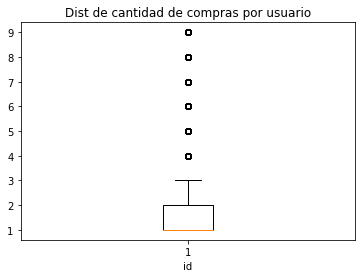

In [70]:
plt.boxplot(aux2)
plt.title("Dist de cantidad de compras por usuario")
plt.xlabel("id")
plt.show()

46409
